## 1. Set environment

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

### Preliminary EDA

In [3]:
def get_summary(dataset):
    print("\nDimensions of dataset \n\n", dataset.shape)  
    print("\n\nSummary of dataset \n\n", dataset.describe())    
    print("\n\nDatatypes \n\n", dataset.dtypes)
    print("\n\nDataset glimpse \n")
    return(dataset.head(5))

get_summary(df)


Dimensions of dataset 

 (3755, 11)


Summary of dataset 

          work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


Datatypes 

 work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object


Dataset glimpse 



,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


## 2. Data processing

### Rename categorical column values for better understanding

In [4]:
df['experience_level'] = df['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})
df['employment_type'] = df['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})
df['remote_ratio'] = df['remote_ratio'].replace({100: 'On-site', 0:'Remote', 50:'Hybrid'})

### Check for duplicates

In [5]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.shape

#keep only the first row of the duplicated rows
df = df.drop_duplicates(keep='last')

### Drop unnecessary columns

In [6]:
df = df.drop(['salary_currency', 'salary'], axis=1)

### Check for missing data

In [7]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 3. Visualization

### Top 10 : Job titles and associated average salary

In [8]:
top_salary =  df.groupby('job_title').agg({'salary_in_usd':'mean'}).round(2).sort_values('salary_in_usd', ascending=False).head(10)
top_salary.head(10)

,salary_in_usd
job_title,
Data Science Tech Lead,375000.00
Cloud Data Architect,250000.00
Data Lead,212500.00
Data Analytics Lead,211254.50
Principal Data Scientist,198171.12
Director of Data Science,195140.73
Principal Data Engineer,192500.00
Machine Learning Software Engineer,192420.00
Applied Scientist,190342.58


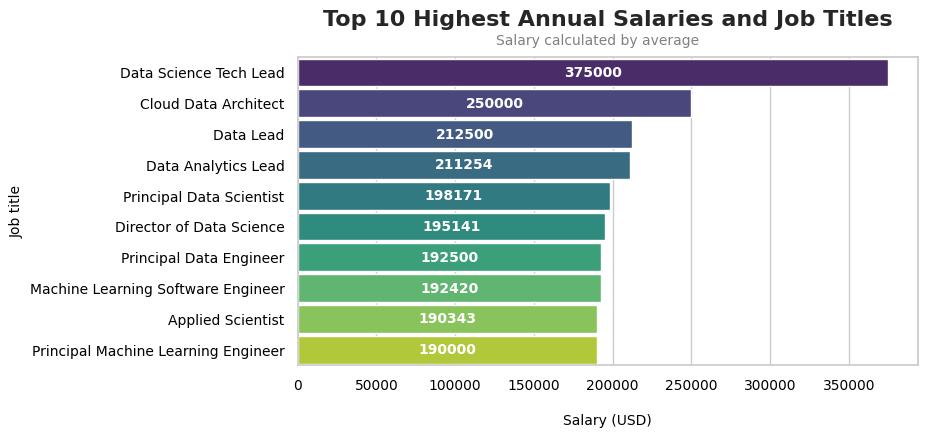

In [9]:
plt.figure(figsize=(8,4))

sns.set(style="whitegrid")
ax= sns.barplot(y = top_salary.index, x ='salary_in_usd', 
            data = top_salary,           
            palette = "viridis",
            width=0.9)
            
plt.title('Top 10 Highest Annual Salaries and Job Titles\n', fontsize=16, fontweight="bold", loc="center")
plt.suptitle("\nSalary calculated by average\n", fontsize = 10, color="gray")
plt.xlabel('\nSalary (USD)', color="black", fontsize=10)
plt.ylabel('Job title', color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

for i in ax.containers:
    ax.bar_label(i, size=10, label_type = "center", color="white", fontweight="bold")

plt.show() #not needed in Jupyter environment but this opens the plot in another window in other environments

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(0, -100000.0, '−100000'),
  Text(0, 0.0, '0'),
  Text(0, 100000.0, '100000'),
  Text(0, 200000.0, '200000'),
  Text(0, 300000.0, '300000'),
  Text(0, 400000.0, '400000'),
  Text(0, 500000.0, '500000')])

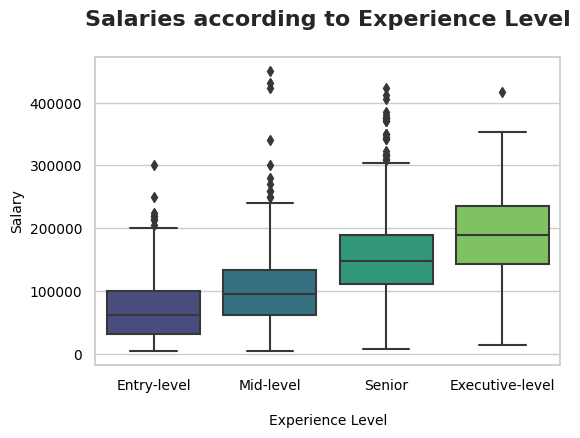

In [10]:
plt.figure(figsize=(6,4))

median_salary = df.groupby('experience_level')['salary_in_usd'].median().reset_index().sort_values('salary_in_usd')

sns.boxplot(data=df, x='experience_level', y='salary_in_usd', 
            order=median_salary['experience_level'], 
            palette="viridis")

plt.title("Salaries according to Experience Level\n", fontsize=16, fontweight="bold", loc="center")
plt.xlabel("\nExperience Level", color="black", fontsize=10)
plt.ylabel("Salary", color="black", fontsize=10)
plt.xticks(fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

In [11]:
df.work_year.value_counts()

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

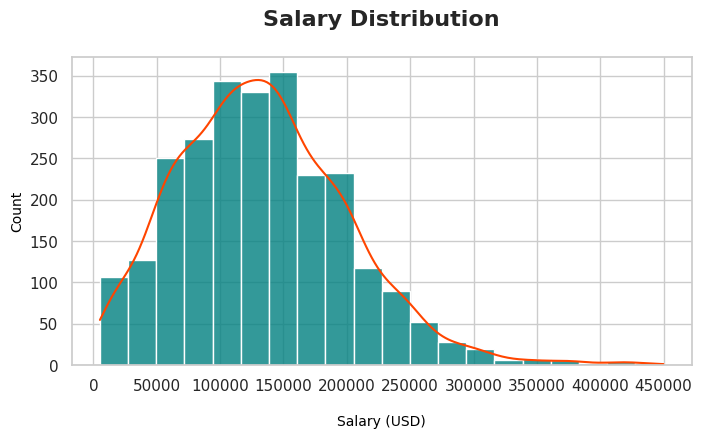

In [12]:
#plt.hist(df['salary_in_usd'], bins=20, alpha = 0.8, color="cadetblue")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,4))

ax = sns.histplot(df['salary_in_usd'], alpha=0.8, color = "teal", bins=20,
             kde = True)

plt.xticks(range(0,500000,50000));
plt.title("Salary Distribution\n", fontsize=16, fontweight = "bold")
plt.xlabel('\nSalary (USD)', color="black",fontsize=10)
plt.ylabel('Count', color = "black", fontsize=10)
ax.lines[0].set_color('orangered') #change color of kde line
#ax.lines[0].set_dashes((5,2))


### Does job type influence salary?

In [13]:
job_type = df.groupby('employment_type').agg({'salary_in_usd':'mean'}).round(0).sort_values('salary_in_usd', ascending=False)

job_type

,salary_in_usd
employment_type,
Full-time,134435.0
Contractual,113447.0
Freelancer,51808.0
Part-time,39534.0


In [14]:
import plotly.express as px

fig = px.scatter(job_type, x="salary_in_usd", y=None,
                 size="salary_in_usd", color=job_type.index,
                 size_max=60)

fig.update_layout(yaxis=dict(title=''), xaxis=dict(title='\nAvg. Annual Salary'), title={'text':'Job Type and Average Salary', 'font':{'size':22}})
fig.update_xaxes(range=[5000, 150000], dtick=10000)
fig.update_layout(width=800, height=400)

fig.show()

### Salary range according to company size

<Figure size 800x400 with 0 Axes>

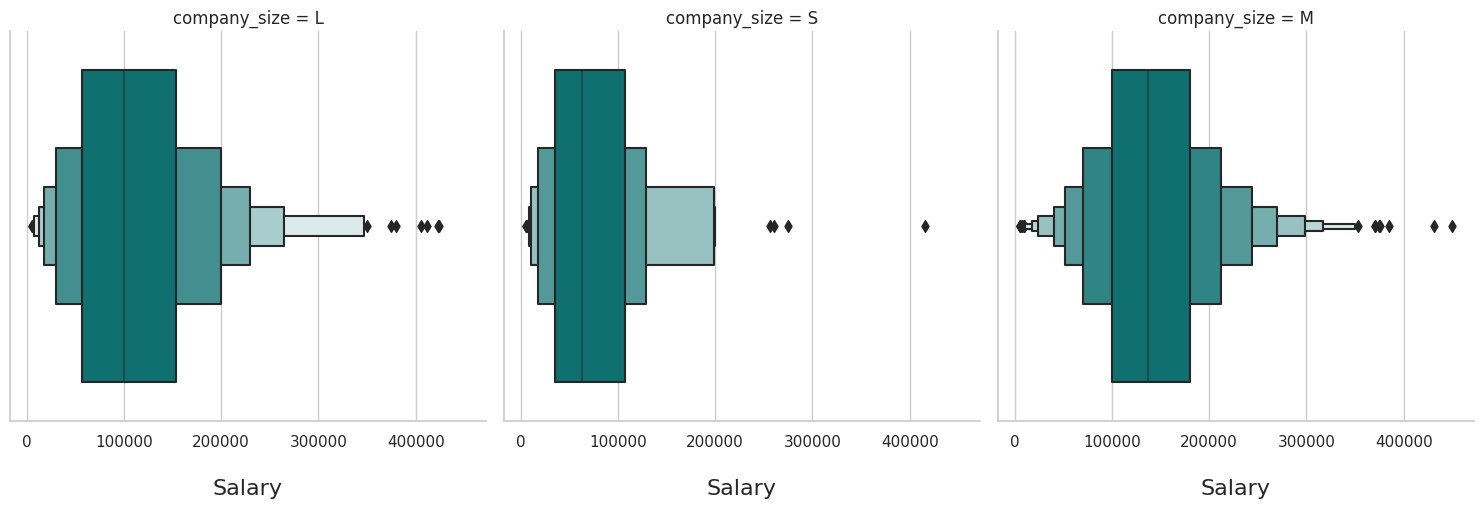

In [15]:
plt.figure(figsize=(8,4))

ax = sns.catplot(data=df, x='salary_in_usd',  col='company_size', kind='boxen', color="teal")

ax.set_xlabels("\nSalary", fontsize =16)
plt.xticks(range(0,500000,100000));


In [16]:
print("Salary according to company size \n")
round(df.groupby('company_size').agg({'salary_in_usd':'mean'}),2)

Salary according to company size 



,salary_in_usd
company_size,
L,113202.24
M,141474.51
S,78364.28


In [17]:
print("Minimum salary: $", df.salary_in_usd.min(),"\nAverage salary: $", round(df.salary_in_usd.mean(),2), "\nMaximum salary: $", df.salary_in_usd.max()) 

Minimum salary: $ 5132 
Average salary: $ 133409.28 
Maximum salary: $ 450000


### Which work mode is more prevalent: on-site, remote, or hybrid?

Text(0.5, 1.0, 'Work Mode\n')

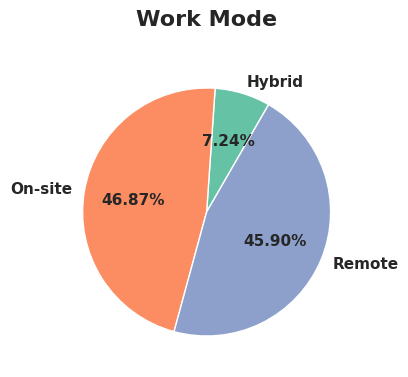

In [18]:
plt.figure(figsize=(4,6))
colors = sns.color_palette('Set2')[0:3]

values = df.groupby('remote_ratio').size()
labels = values.index
#round(values/values.sum()*100, 2)

plt.pie(values, labels=labels, autopct='%1.2f%%', 
             startangle=60, textprops={'fontsize': 11, 'fontweight':"bold"},
             colors = colors)
plt.title("Work Mode\n", fontsize=16, fontweight="bold")


### Country mapping

In [19]:
!pip install pycountry

import pycountry

country_map = {}

for country in pycountry.countries:
    country_map[country.alpha_2] = country.name

df['company_location'] = df['company_location'].replace(country_map)
df['employee_residence'] = df['employee_residence'].replace(country_map)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 80.5 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=5967f49c7c37a3c2042dbdcd4bd5ce30a56781c3a299ef243b5e97a7a64c837a
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


<AxesSubplot: >

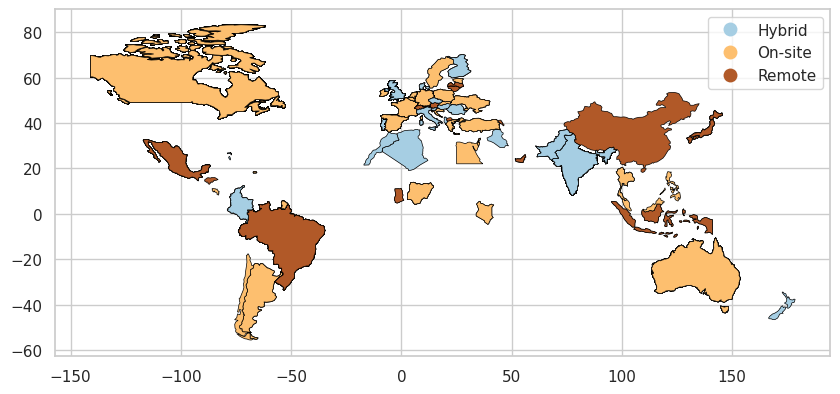

In [20]:
!pip install geopandas
import geopandas as gpd

fig, ax = plt.subplots(figsize=(10,6))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(df, left_on = 'name', right_on ='company_location')

merged.plot(column='remote_ratio', cmap='Paired', linewidth=0.5, ax=ax, edgecolor='black', legend = True)



In [21]:
df_pivot = df.groupby(['company_location', 'remote_ratio']).size().reset_index(name="count")
df_pivot = df_pivot.pivot_table(index='company_location', columns='remote_ratio', values='count', fill_value=0)
df_pivot.sort_values('Remote', ascending=False).head(10)

remote_ratio,Hybrid,On-site,Remote
company_location,,,
United States,39,917,973
United Kingdom,17,55,83
Canada,12,44,27
Spain,5,21,18
Germany,14,25,16
India,20,29,8
Portugal,3,4,7
Ireland,0,3,4
Latvia,0,0,4


In [22]:
us_job_prcnt = round(df.company_location[df.company_location=='United States'].count()/df.company_location.count() *100,2)

print("There are 72 company locations in the dataset.", us_job_prcnt, "% companies are located in the United States.\n")

There are 72 company locations in the dataset. 74.65 % companies are located in the United States.



## 4. Linear regression - Predict success factors for higher salary

### Prepare data for regression

- Remove outliers from the dataset using IQR method.

- One of the key assumptions of linear regression is that the outcome variable is normally distributed. If the outcome variable is not normally distributed, it can lead to biased or inefficient estimates of the regression coefficients and inflated standard errors. To make non-normal values normal, transform the outcome variable (eg. log transformation, Box-Cox).

- Scale the outcome variable.

- Split data to create training, validation, and test sets


In [23]:
#create copy of dataset

df_copy = df

#drop column that will not be considered a feature for LR model
df_copy = df_copy.drop(['work_year','employee_residence','remote_ratio'], axis=1)
df_copy.shape

(2584, 6)

In [24]:
#Remove outliers
Q1 = df_copy['salary_in_usd'].quantile(0.25)
Q3 = df_copy['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
df_copy = df_copy[~((df_copy['salary_in_usd']< (Q1 - 1.5 * IQR)) | (df_copy['salary_in_usd'] > (Q3 + 1.5 * IQR)))]
df_copy.shape

(2555, 6)

### Split data into train (80%) and test (20%) sets

In [25]:
categorical_vars = ['experience_level','job_title' ,'company_location','company_size','employment_type']
numeric_vars = ['salary_in_usd']

X = df_copy[categorical_vars]
#X = df_copy[categorical_vars].copy().reset_index(drop=True)

X.head()

y = df_copy[numeric_vars]
y.head()

,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


- Before the features are fed into the linear regression model, the categorical variables need to encoded into a binary version. This is done by preprocessing and one such method is One Hot Encoder. 

### Preprocess

#### Numerical column transformation

In [27]:
# Transform any non-normal distributions of salary to a normal distribution

df_copy['salary_in_usd'] = np.log1p(df_copy['salary_in_usd'])

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_copy['salary_in_usd'] = scaler.fit_transform(df_copy[['salary_in_usd']]) #double [] used because this function needs a 2-d array and salary column by itself is a 1-d array

#### Categorical column transformation

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

cat_cols = df_copy.select_dtypes(include=['object']).columns
num_cols = df_copy.select_dtypes(include=['float64']).columns

categorical_transformer = Pipeline(steps=[("hotencoder", OneHotEncoder(handle_unknown="ignore"))])


In [30]:
df_copy.salary_in_usd.dtype
cat_cols
num_cols

Index(['salary_in_usd'], dtype='object')

#### Combine num and cat cols into a pipeline

In [31]:
#preprocessor pipeline

from sklearn.compose import ColumnTransformer

#preprocessor = ColumnTransformer(transformers=[
     #   ('cat', categorical_transformer, cat_cols),('num', 'passthrough', num_cols)])

preprocessor = ColumnTransformer(transformers=[ ("cat", categorical_transformer, cat_cols) ])
                                              

### Build LR model

In [32]:
#call the LR model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [33]:
#create the pipeline

from sklearn.pipeline import Pipeline

lr_train = Pipeline(steps = [("preprocessor", preprocessor),
                                ("lr", lr)])

In [34]:
# fit the model with data 

reg_model = lr_train.fit(X_train,y_train)

In [35]:
print("Intercept: ", reg_model.named_steps['lr'].intercept_)

Intercept:  [49092.59391996]


In [36]:
#print("Coefficients: ", reg_model.named_steps['lr'].coef_)

In [37]:
X_pred = reg_model.predict(X_test)

In [38]:
print("Predicted values: ", X_pred[0:5].round(2))

Predicted values:  [[162290.41]
 [133589.86]
 [124919.5 ]
 [193196.02]
 [161097.35]]


In [39]:
y_test.salary_in_usd[0:5]

3401    140000
3505     82744
2839     60000
1931    164000
1102    140000
Name: salary_in_usd, dtype: int64

In [40]:
# calculate error
from sklearn.metrics import mean_absolute_error, r2_score

mea = mean_absolute_error(y_test,X_pred)
r2_score = r2_score(y_test, X_pred)

print("\n The mean absolute error is: ", mea, "\n The r-squared score is ", r2_score)


 The mean absolute error is:  37370.32035271366 
 The r-squared score is  0.4310625943769979


### Conclusion

> - Linear regression analysis revealed that job title, experience level, employment type, company size, and company location are robust predictors of salary. 

> - Interestingly, work mode and employee's residence location do not appear to have a strong impact on salary.

> - The linear regression model is expected to provide more accurate results with a lower mean error absolute value with a larger dataset.

### Extra

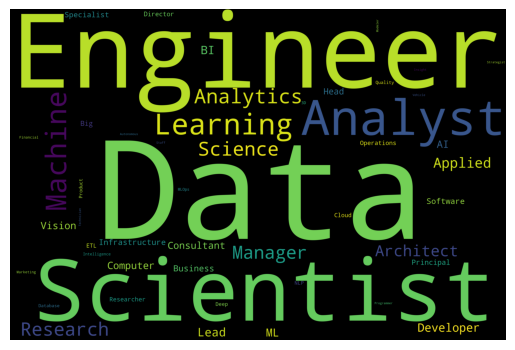

<Figure size 1600x1200 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [41]:
#!pip install wordcloud
from wordcloud import WordCloud

text = df['job_title'].values
text = ' '.join(text)


wordcloud = WordCloud(width = 3000, height = 2000, collocations=False, colormap= 'viridis', 
                      random_state=1, max_words=50, background_color="black").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.tight_layout(pad = 0) 
plt.figure(figsize=[16,12])


#### Thank you for going through my notebook! I would appreciate your feedback and comments.
#### Check my blog on this notebook : [Link](https://emptyjar.in/post/crunching-the-numbers-what-determines-salaries-in-the-data-industry)